# Importing the Data and Library

In [142]:
import os

# Data analytics libraries
import numpy as np
import pandas as pd
import missingno as msno
import statsmodels.api as sm
import pydotplus, graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

# ML Libraries
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
# from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")


# import dataset
demographic_df = pd.read_csv("demographic data.csv")

In [143]:
# display demographic data
demographic_df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [144]:
# check shape of data sets
print("Demographic Data", demographic_df.shape)

Demographic Data (71295, 12)


# Describe data

In [145]:
# lets check the dataset for numeric variables
demographic_df.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


Age and Income variables have negative values

# Unique Values

In [146]:
# unique values for each column
demographic_df.nunique()

Application ID                                 71292
Age                                               53
Gender                                             2
Marital Status (at the time of application)        2
No of dependents                                   5
Income                                            63
Education                                          5
Profession                                         3
Type of residence                                  5
No of months in current residence                121
No of months in current company                   83
Performance Tag                                    2
dtype: int64

In [147]:
# Classify the columns on the basis of catogorical and continous data
def find_type_variable(df, threashold):
    """
    Find out the continous and categorical columns
    Inputs - 
    df :- dataset given as pandas dataset
    threashold :- threashold value that determines having how much unique values makes column continous from categorical
    """
    col_unique_valu_dict = {}
    for col in df.columns:
        col_unique_valu_dict[col] = df[col].unique()

    categorical_cols = []
    continous_cols = []
    for k, v in col_unique_valu_dict.items():
        if len(v) < threashold:
            categorical_cols.append(k)
        else:
            continous_cols.append(k)

    print("Categorical Data Columns - ", categorical_cols, "\n")
    print("Continous Data Columns", continous_cols, "\n")


# print the continous and categorical columns list 
print("Demographic Data\n")
find_type_variable(demographic_df, 10)

Demographic Data

Categorical Data Columns -  ['Gender', 'Marital Status (at the time of application)', 'No of dependents', 'Education', 'Profession ', 'Type of residence', 'Performance Tag'] 

Continous Data Columns ['Application ID', 'Age', 'Income', 'No of months in current residence', 'No of months in current company'] 



# Duplicate Check

In [148]:
# lets display the duplicate records for application id
def findout_duplicates_in_unique_column(df, col):
    """
    Find out the dataframe with duplicate values in the column where values needs to be unique
    Input - 
    df - dataframe in pandas
    col - column name that supposed to have unique value
    """
    dup_col = df[col]
    df_duplicate = df[dup_col.isin(dup_col[dup_col.duplicated()])]
    return df_duplicate

In [149]:
# findout the duplicate rows in the data set
demographic_df.duplicated().sum()

0

In [150]:
# findout the dupicates of application id col
findout_duplicates_in_unique_column(demographic_df, "Application ID")

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0


In [151]:
# lets drop the duplicates as Application ID column is having duplicate values but the other columns 
# are having unique values so we will delete the second rows considering it as invalid data

demographic_df.drop_duplicates("Application ID",inplace = True)

In [152]:
# see if the dataset have duplicates in application id col
findout_duplicates_in_unique_column(demographic_df, "Application ID")

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag


#### Duplicates are removed

# Categorical Value Encoding

In [153]:
# printing the categorical values and counts
print(demographic_df["Gender"].value_counts(), "\n")
print(demographic_df["Marital Status (at the time of application)"].value_counts(), "\n")
print(demographic_df["Education"].value_counts(), "\n")
print(demographic_df["Profession "].value_counts(), "\n")
print(demographic_df["Type of residence"].value_counts(), "\n")

M    54453
F    16837
Name: Gender, dtype: int64 

Married    60727
Single     10559
Name: Marital Status (at the time of application), dtype: int64 

Professional    24837
Masters         23970
Bachelor        17697
Phd              4548
Others            121
Name: Education, dtype: int64 

SAL        40438
SE_PROF    16535
SE         14305
Name: Profession , dtype: int64 

Rented                 53394
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
Name: Type of residence, dtype: int64 



In [154]:
# Label encoding the data
demographic_df["Gender"] = demographic_df["Gender"].map({"F":0, "M":1})
demographic_df["Marital Status (at the time of application)"] = demographic_df["Marital Status (at the time of application)"].map({"Married":1, "Single":0})
demographic_df["Education"] = demographic_df["Education"].map({"Professional":4,  "Phd":3, "Masters":2, "Bachelor":1, "Others":0})
demographic_df["Profession "] = demographic_df["Profession "].map({"SAL":0, "SE_PROF":1, "SE":2})
demographic_df["Type of residence"] = demographic_df["Type of residence"].map({"Rented":0, "Owned":1, "Living with Parents":2, "Company provided":3, "Others":4 })

demographic_df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,0.0,1.0,2.0,40.0,1.0,0.0,0.0,113,56,0.0
1,432830445,31,1.0,1.0,4.0,55.0,4.0,1.0,0.0,112,46,0.0
2,941387308,32,1.0,0.0,2.0,46.0,1.0,1.0,0.0,104,49,0.0
3,392161677,43,1.0,1.0,1.0,53.0,1.0,2.0,0.0,94,53,0.0
4,182011211,35,0.0,1.0,5.0,44.0,4.0,0.0,0.0,112,43,0.0


# Missing Values

In [155]:
def plot_missing_percentage(df):
    """
    Plot the bar graph showing the percentage of missing values for each column having missing value
    Input - 
    df : dataframe in pandas
    """
    df = round((df.isnull().sum()*100/len(df)).sort_values(ascending=False), 2)
    df = df[df>0]
    df = pd.DataFrame({"Column Name" : df.index, "Percentage of Missing Value": df.values})

    # Set the theme of plots
    sns.set_theme(style="darkgrid", palette="pastel")
    plt.suptitle("Percentage of Missing Values for the Columns Having Missing Values")
    ax = sns.barplot(x="Percentage of Missing Value", y="Column Name", data=df)
    plt.xlabel("% of Missing Values", labelpad=20)
    plt.ylabel(None)
    for i in ax.containers:
        ax.bar_label(i,)

    plt.plot()
    
    
    
def filter_non_null_data(df_main):
    """
    Function filter out the columns not having any null value and also select rows that not having null value in any column
    Input - 
    df_main : pandas dataframe
    
    """
    df_null_count = round((df_main.isnull().sum()*100/len(df_main)).sort_values(ascending=False), 2)
    df_null_col = df_null_count[df_null_count>0]
    df_null = df_main[list(df_null_col.index)]
    df_null_mask = df_null.isnull().any(axis=1)
    df = df_null[df_null_mask]
    
    return df


# replace na with constant
def replace_with_constant(df, col):
    df[col].fillna(constant, inplace=True)
    return df

# replace na with mode
def replace_with_mode(df, col):
    df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# replace na with MICE method
def replace_with_mice(df, col):
    """
    Impute the missing values by MICE method
    Input - 
    df : dataframe in pandas
    col : column name
    """
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    # Initialize the MICE imputer
    mice_imputer = IterativeImputer(max_iter=10, random_state=0,)

    # Fit the imputer to your dataset
    mice_imputer.fit(df)

    # Perform the imputation
    imputed_data = mice_imputer.transform(df)

    # Convert the result to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
    
    # return the data
    return df



#### Demographic data Missing value

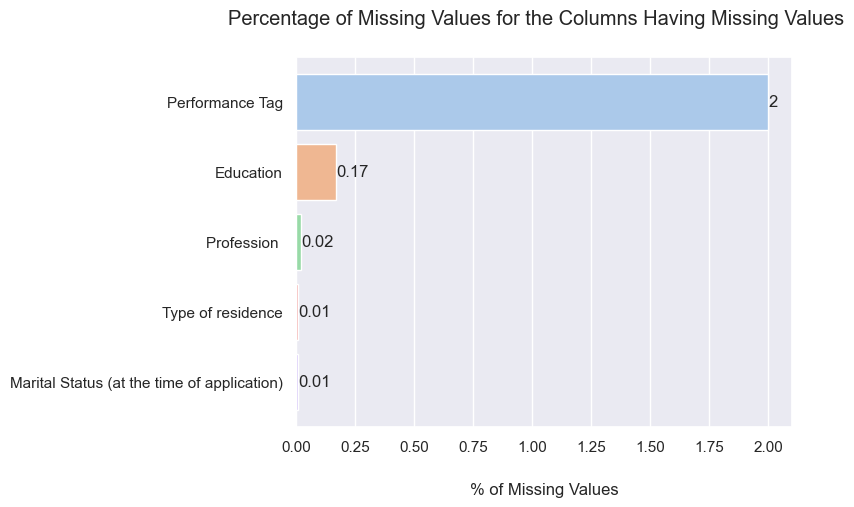

In [156]:
# plotting the missing values
plot_missing_percentage(demographic_df)

<Axes: >

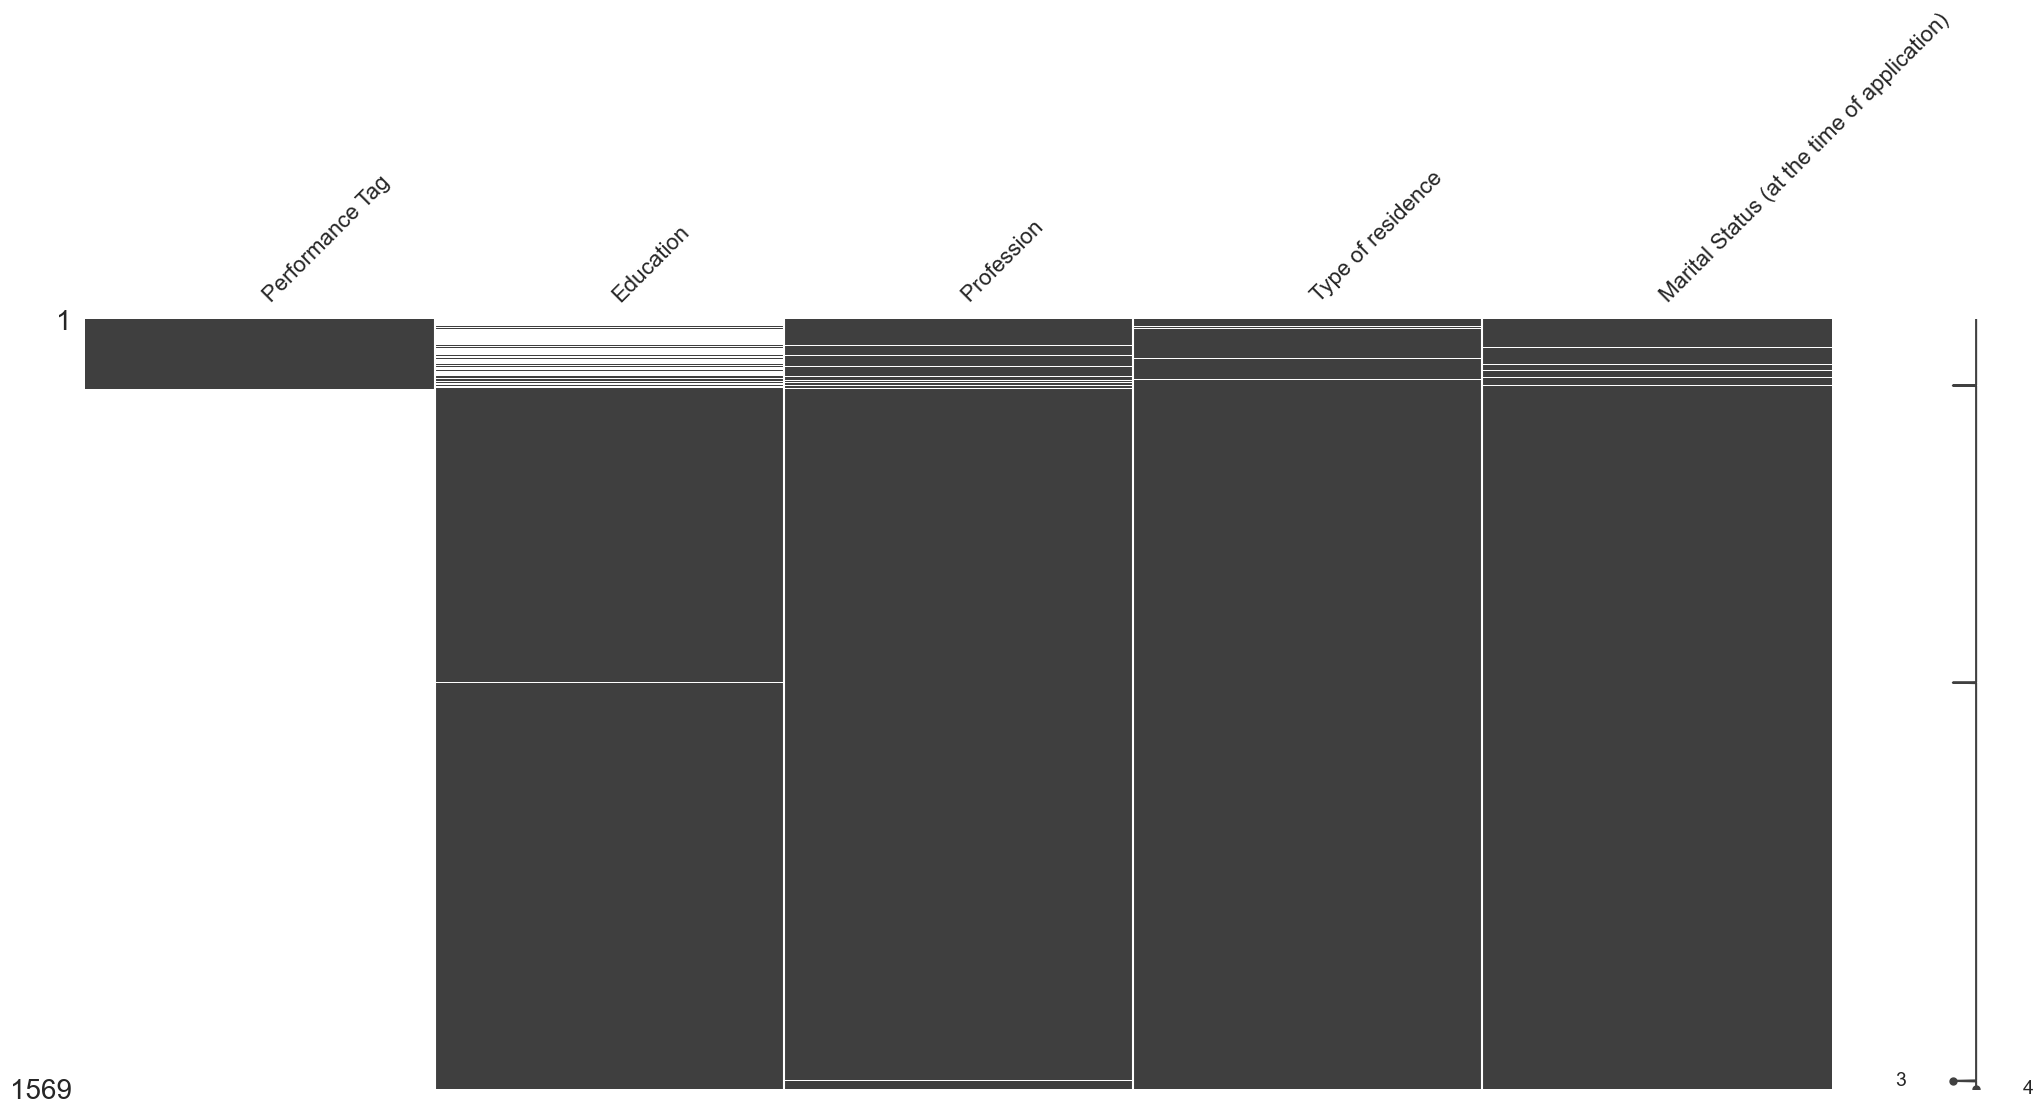

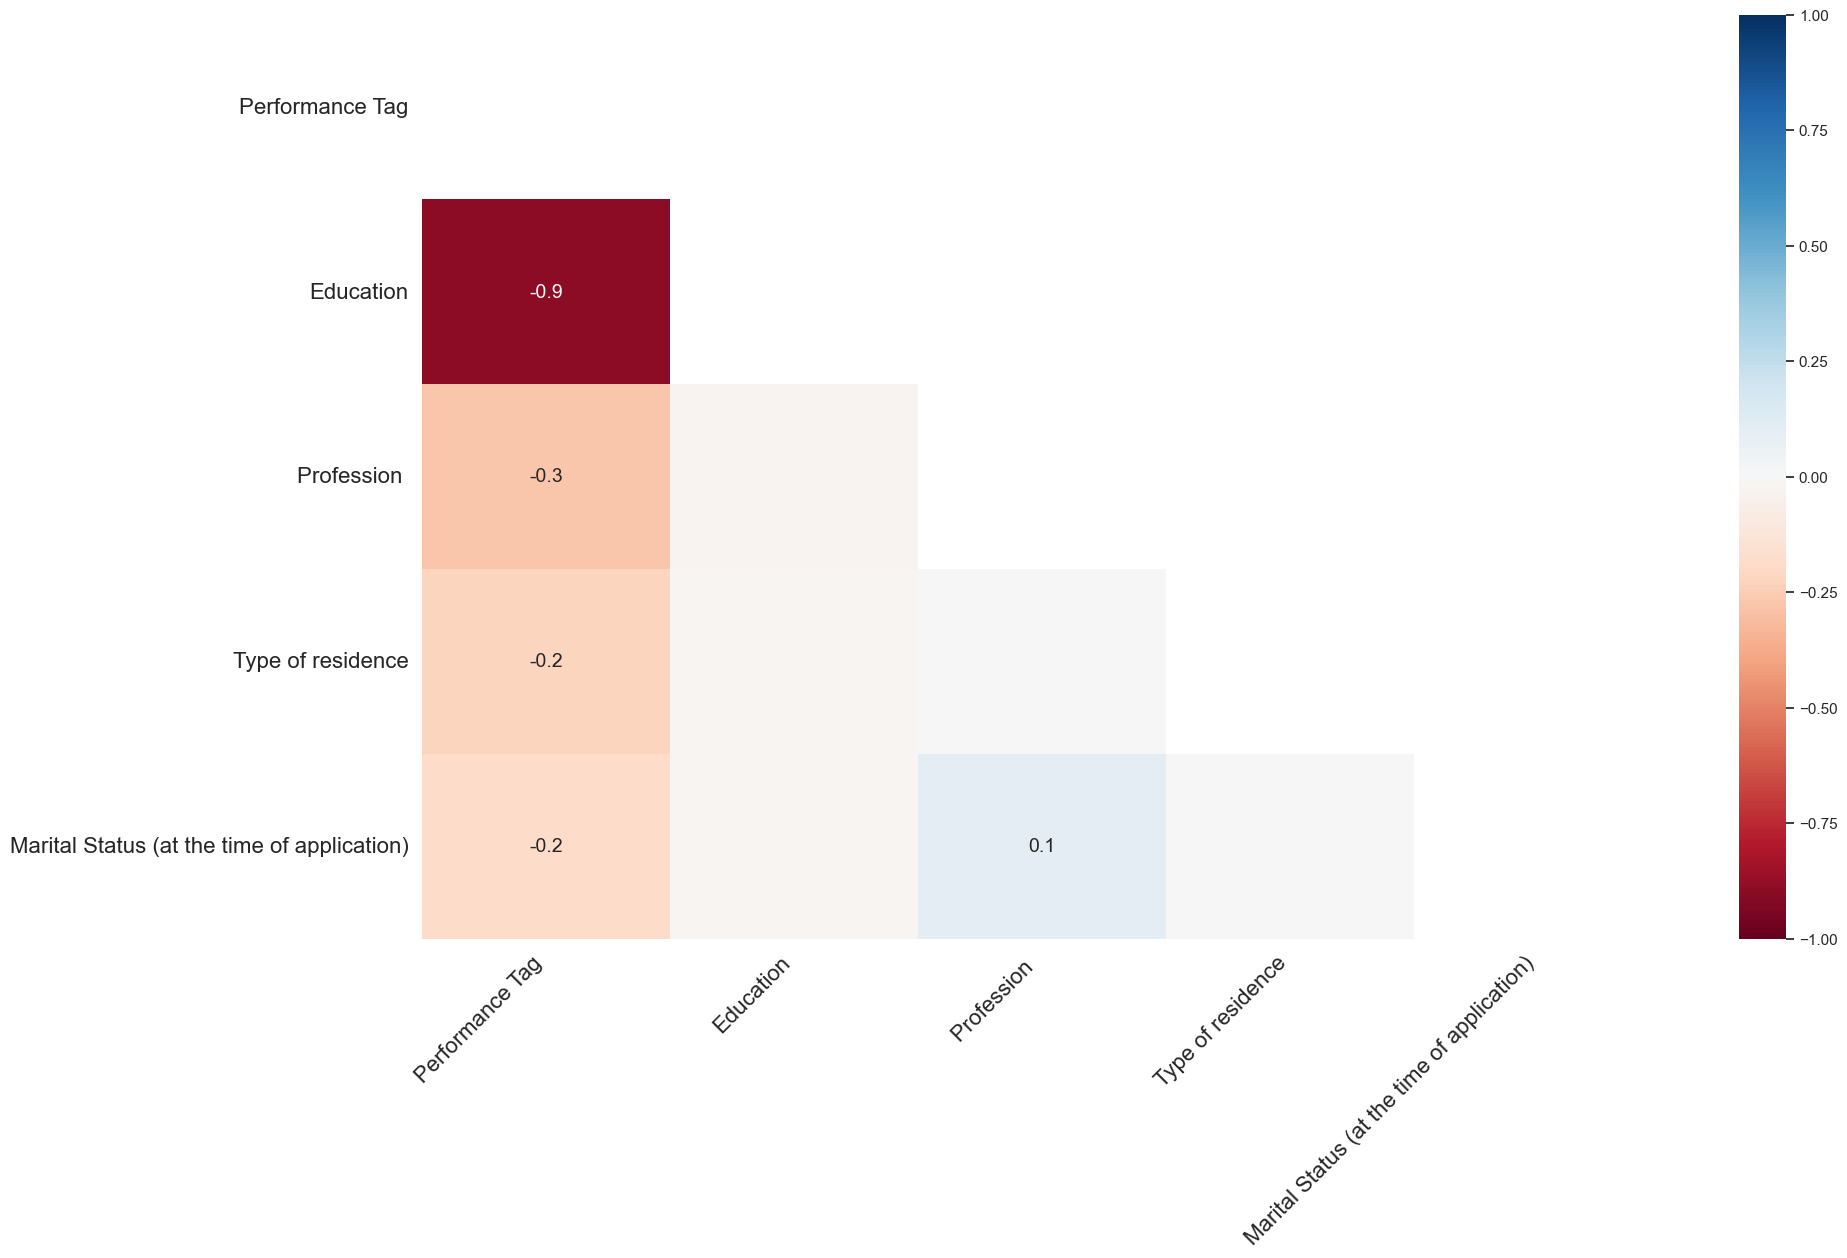

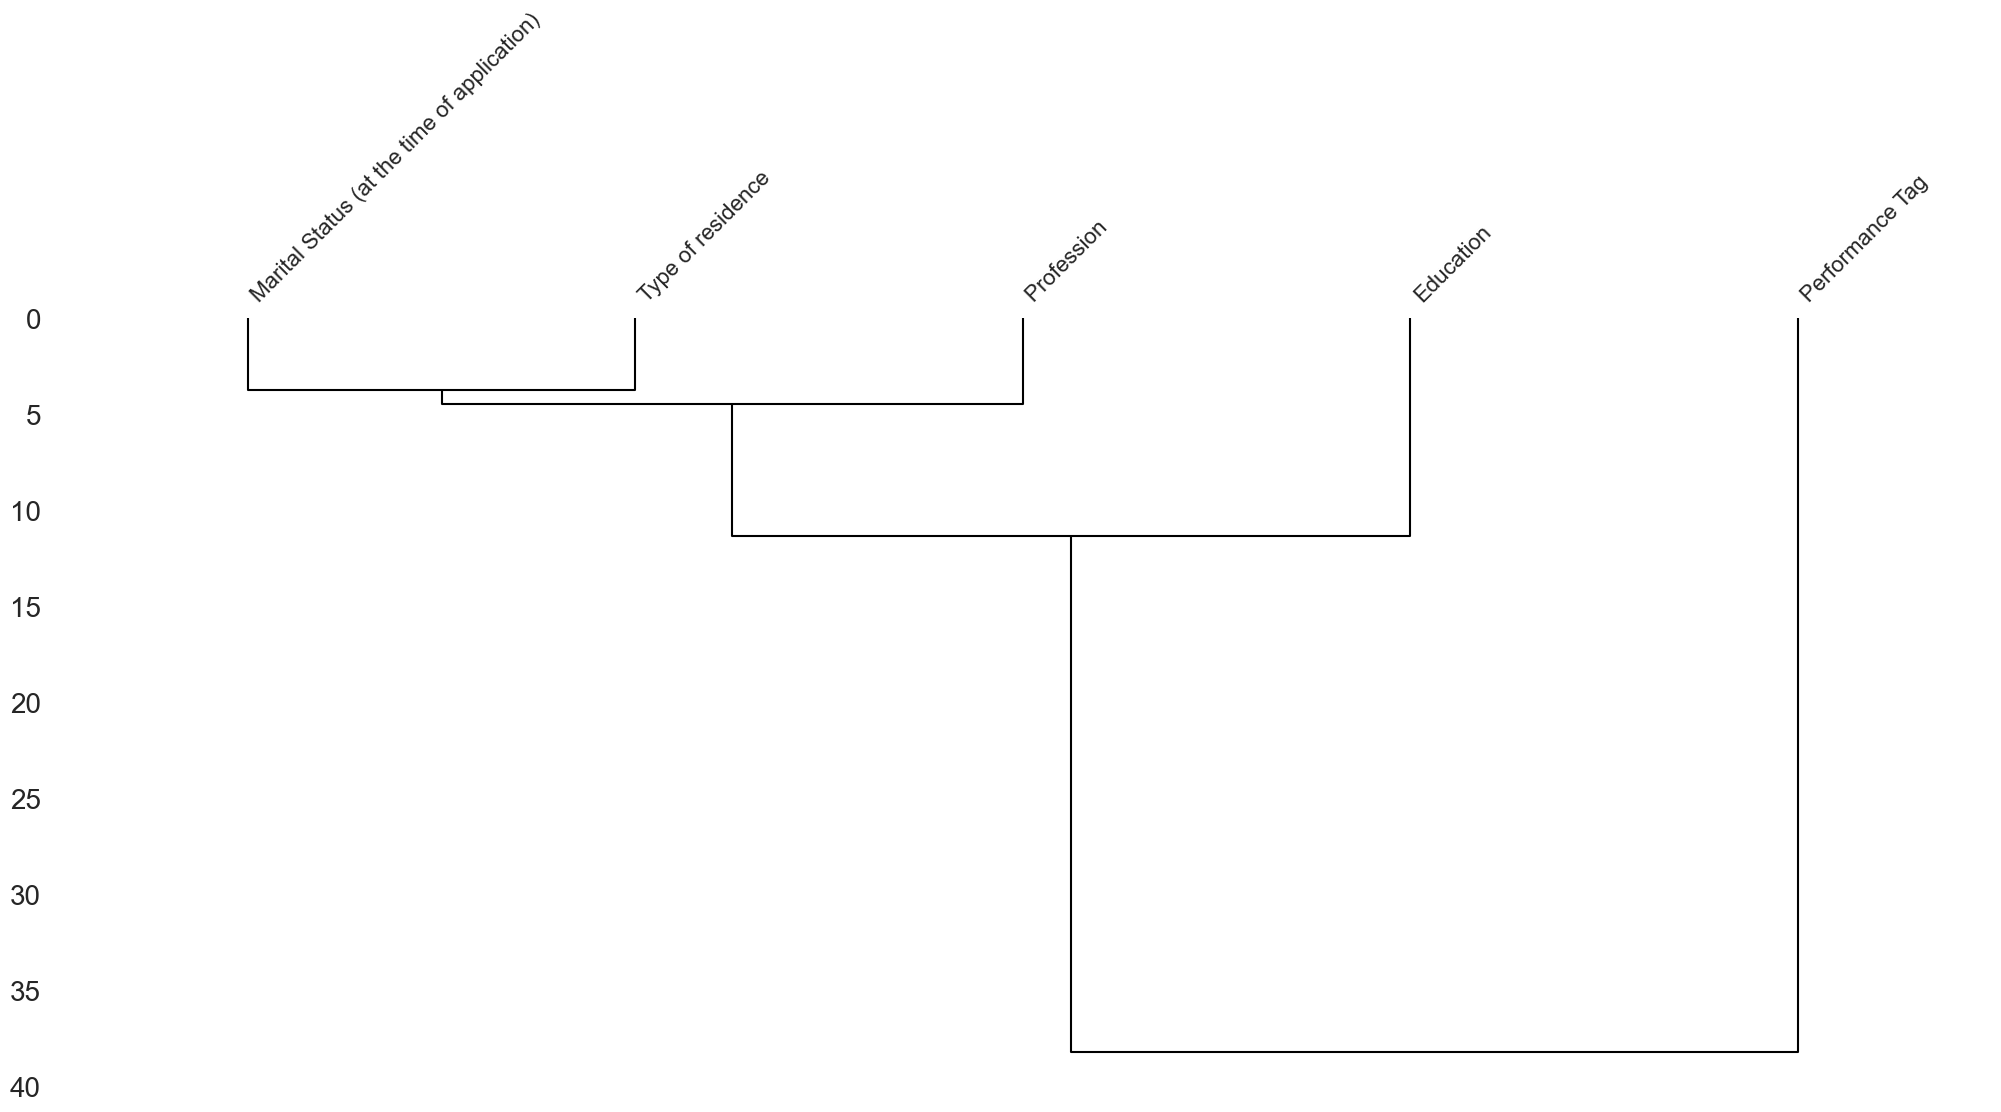

In [157]:
# filtering the data and selecting the only null value data
null_demographic_data = filter_non_null_data(demographic_df)

# plotting the matrix showing the null values of columns
msno.matrix(null_demographic_data)

# plotting the heatmap showing correlation of columns
msno.heatmap(null_demographic_data)

# plotting the dendrograph showing the tree based relationship of null values in column
msno.dendrogram(null_demographic_data)

As per the above correlation it can be concluded that - 

There is no relationship between null values of any columns except the column "Performance Tag" as this column having null values mostly where other columns are having the values.

### Type of Missing Data for each column
- 'Performance Tag' - Missing Completely at Random (MCAR)
- 'Education' - Missing Completely at Random (MCAR)
- 'Type of residence' - Missing Completely at Random (MCAR)

- 'Marital Status (at the time of application)' - Missing at Random (MAR)
- 'Profession ' - Missing at Random (MAR)

#### Imputing missing value for "Education"


In [163]:
# replace na with MICE method
def replace_with_mice(df, col):
    """
    Impute the missing values by MICE method
    Input - 
    df : dataframe in pandas
    col : column name
    """
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    # Initialize the MICE imputer
    mice_imputer = IterativeImputer(max_iter=10, random_state=0,)

    # Fit the imputer to your dataset
    mice_imputer.fit(df)

    # Perform the imputation
    imputed_data = mice_imputer.transform(df)

    # Convert the result to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
    
    # return the data
    return imputed_df

df_temp = replace_with_mice(demographic_df, "Education")

#### Imputing missing value for "Type of residence"


In [ ]:
# Replacing NAN with Missing value
null_demographic_data = null_demographic_data.fillna("Missing Value")

#### Imputing missing value for "Profession"

In [46]:
# finding the relation between variable 'Marietal status' and missingness in 'Profession ' 
# by finding the count of mariatal status values for missing value in profession
null_demographic_data[null_demographic_data["Profession "]=="Missing Value"]["Marital Status (at the time of application)"].value_counts()

Married          12
Single            1
Missing Value     1
Name: Marital Status (at the time of application), dtype: int64

Profession variable having missing data mostly when marriatal status is Married hence we will replace the value in profession considering the mode value of profession for marrital status 'Married'.

In [48]:
# finding the count of values in Profession when mariatal status is Married 
demographic_df[demographic_df['Marital Status (at the time of application)']=="Married"]["Profession "].value_counts()

SAL        34471
SE_PROF    14013
SE         12231
Name: Profession , dtype: int64

As "SAL" is the highest count when marriatal status is married we will replace this when "Profession" is missing.

In [51]:
# Replacing the missing value for profession when marriatal status is Married
condition1 = demographic_df["Marital Status (at the time of application)"]=="Married" 
condition2 = demographic_df["Profession "]== " Missing Value"
demographic_df.loc[(condition1 & condition2), "Profession "]="SAL"

#### Imputing the missing value for "Marital Status (at the time of application)"

In [53]:
# finding the relation between variable 'Profession ' and missingness in 'Marietal status'
# by finding the count of 'Profession ' values for missing value in 'Marietal status'
null_demographic_data[null_demographic_data["Marital Status (at the time of application)"]=="Missing Value"]["Profession "].value_counts()

SAL              4
SE_PROF          1
Missing Value    1
Name: Profession , dtype: int64

In [54]:
# finding the count of values in mariatal status when Profession is Married 
demographic_df[demographic_df["Profession "]=="SAL"]['Marital Status (at the time of application)'].value_counts()

Married    34471
Single      5963
Name: Marital Status (at the time of application), dtype: int64

In [56]:
# Replacing the missing value for profession when marriatal status is Married
condition1 = demographic_df["Marital Status (at the time of application)"]=="Missing Value" 
condition2 = demographic_df["Profession "]== "SAL"
demographic_df.loc[(condition1 & condition2), "Marital Status (at the time of application)"]="Married"

As there is no correlation between the other variables, missing values will not be replaced based on the values of other columns.